# Homework 3
## **Group 2:** *Andrew Boehm, Ayssia Nicole Crockem, Avni Patel, Isabella Peterson, Kruthik Ravikanti, Ellie Kate Watson, Margaret Ailin Wei*

**What *is* a leaky integrate and fire (LIF) neuron model?**
> The Leaky-Integrate and Fire model (LIF) is an expansion of the basic Integrate & Fire model (IF). It extends to include the 'leaky' ion channels that are in cell membranes and allow for a more natural decay of the membrane potential overtime. The inclusion of the leaky channels makes this model more biologically realistic.

**What *is* a (HH) neuron model?**
>The Hodgkin-Huxley model is a more complex and realistic version of the LIF and IF models. This model incorporates voltage-gated ion channels, such as sodium (Na+) and potassium (K+) channels, to make this the most accurate model representation of neurons.

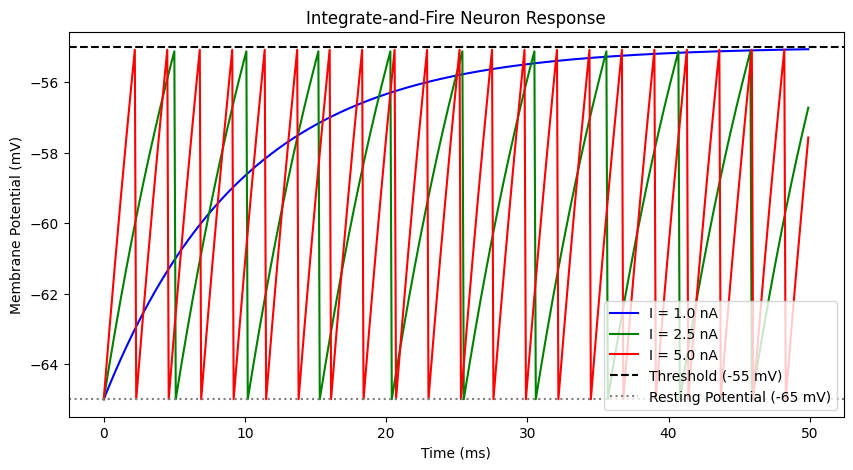

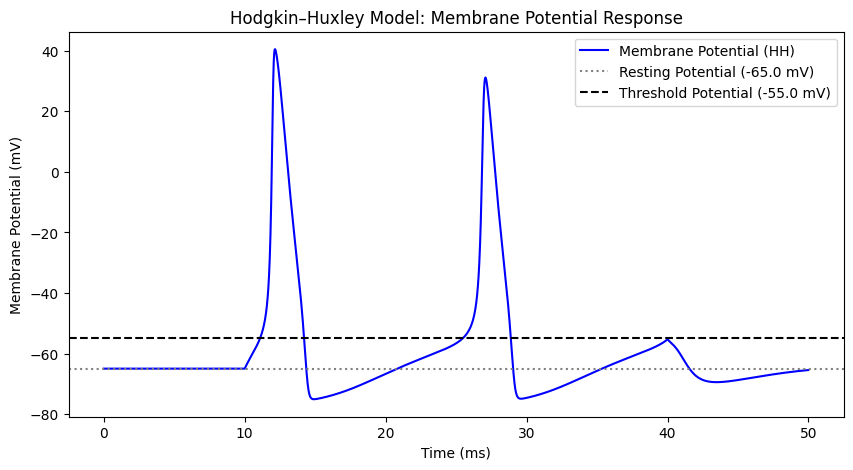

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###############################################
# Part 1: Integrate-and-Fire (I&F) Model Code
###############################################

# I&F simulation parameters
dt_IF = 0.1  # Time step (ms)
T_IF = 50   # Total simulation time (ms)
time_IF = np.arange(0, T_IF, dt_IF)

# I&F neuron parameters
tau_m = 10      # Membrane time constant (ms)
R_m = 10        # Membrane resistance (MΩ)
V_rest = -65    # Resting potential (mV)
V_thresh = -55  # Firing threshold (mV)
V_reset = -65   # Reset potential after spike (mV)

def integrate_and_fire(I, T=T_IF, dt=dt_IF):
    """Simulates an Integrate-and-Fire neuron given a constant input current I."""
    V = np.full_like(time_IF, V_rest)  # Initialize membrane potential array
    spikes = []  # List to record spike times

    for t in range(1, len(time_IF)):
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Check for spike
            V[t] = V_reset  # Reset the potential
            spikes.append(time_IF[t])
    return V, spikes

# Run the I&F simulation for several input current amplitudes
currents_IF = [1.0, 2.5, 5.0]  # (nA)
colors_IF = ['b', 'g', 'r']

plt.figure(figsize=(10, 5))
for I, color in zip(currents_IF, colors_IF):
    V, spikes = integrate_and_fire(I)
    plt.plot(time_IF, V, label=f'I = {I} nA', color=color)

plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting Potential (-65 mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Neuron Response")
plt.legend()
plt.show()


###############################################
# Part 2: Hodgkin–Huxley (HH) Model Code
###############################################

# HH simulation parameters
dt_HH = 0.01  # Time step (ms)
T_HH = 50     # Total simulation time (ms)
time_HH = np.arange(0, T_HH, dt_HH)

# HH model parameters
C_m  = 1.0      # Membrane capacitance (µF/cm²)
g_Na = 120.0    # Maximum sodium conductance (mS/cm²)
g_K  = 36.0     # Maximum potassium conductance (mS/cm²)
g_L  = 0.3      # Leak conductance (mS/cm²)
E_Na = 50.0     # Sodium reversal potential (mV)
E_K  = -77.0    # Potassium reversal potential (mV)
E_L  = -54.387  # Leak reversal potential (mV)

# Define resting and threshold potentials for plotting in HH
V_rest_HH = -65.0   # Resting potential (mV)
V_thresh_HH = -55.0  # Assumed threshold potential (mV)

# Rate functions (in ms⁻¹) for the gating variables
def alpha_n(V):
    if abs(V + 55) < 1e-6:
        return 0.1
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    if abs(V + 40) < 1e-6:
        return 1.0
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

# Initialize state variables for the HH model
V_HH = np.empty_like(time_HH)
m_HH = np.empty_like(time_HH)
h_HH = np.empty_like(time_HH)
n_HH = np.empty_like(time_HH)

# Set initial conditions
V_HH[0] = V_rest_HH  # Start at resting potential
m_HH[0] = alpha_m(V_HH[0]) / (alpha_m(V_HH[0]) + beta_m(V_HH[0]))
h_HH[0] = alpha_h(V_HH[0]) / (alpha_h(V_HH[0]) + beta_h(V_HH[0]))
n_HH[0] = alpha_n(V_HH[0]) / (alpha_n(V_HH[0]) + beta_n(V_HH[0]))

# Define the external (injected) current for HH (µA/cm²)
I_HH = np.zeros_like(time_HH)
I_inj = 10.0  # Amplitude of injected current (µA/cm²)
# Inject current between 10 ms and 40 ms
I_HH[(time_HH >= 10) & (time_HH <= 40)] = I_inj

# Simulate the HH model using the Euler method
for t in range(1, len(time_HH)):
    # Update gating variables using Euler's method
    dm = dt_HH * (alpha_m(V_HH[t-1]) * (1 - m_HH[t-1]) - beta_m(V_HH[t-1]) * m_HH[t-1])
    dh = dt_HH * (alpha_h(V_HH[t-1]) * (1 - h_HH[t-1]) - beta_h(V_HH[t-1]) * h_HH[t-1])
    dn = dt_HH * (alpha_n(V_HH[t-1]) * (1 - n_HH[t-1]) - beta_n(V_HH[t-1]) * n_HH[t-1])
    m_HH[t] = m_HH[t-1] + dm
    h_HH[t] = h_HH[t-1] + dh
    n_HH[t] = n_HH[t-1] + dn

    # Compute ionic currents at the previous time step
    I_Na = g_Na * (m_HH[t-1] ** 3) * h_HH[t-1] * (V_HH[t-1] - E_Na)
    I_K  = g_K  * (n_HH[t-1] ** 4) * (V_HH[t-1] - E_K)
    I_L  = g_L  * (V_HH[t-1] - E_L)

    # Update membrane potential using the HH equation
    dV = dt_HH * (I_HH[t-1] - I_Na - I_K - I_L) / C_m
    V_HH[t] = V_HH[t-1] + dV

# Plot the HH model results with lines for resting and threshold potentials
plt.figure(figsize=(10, 5))
plt.plot(time_HH, V_HH, 'b', label='Membrane Potential (HH)')
plt.axhline(V_rest_HH, linestyle=':', color='gray',
            label=f"Resting Potential ({V_rest_HH} mV)")
plt.axhline(V_thresh_HH, linestyle='--', color='black',
            label=f"Threshold Potential ({V_thresh_HH} mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin–Huxley Model: Membrane Potential Response")
plt.legend()
plt.show()


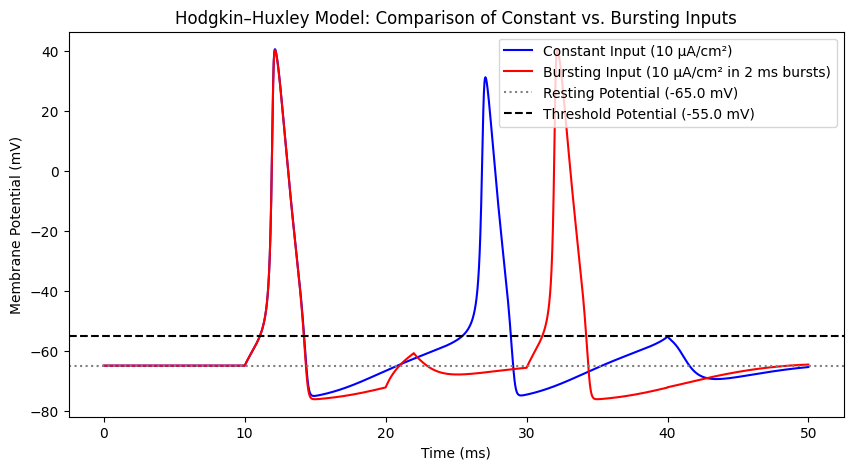

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###############################################
# Hodgkin–Huxley (HH) Model with Two Input Patterns
###############################################


# HH simulation parameters
dt_HH = 0.01  # Time step (ms)
T_HH = 50     # Total simulation time (ms)
time_HH = np.arange(0, T_HH, dt_HH)

# HH model parameters
C_m  = 1.0      # Membrane capacitance (µF/cm²)
g_Na = 120.0    # Maximum sodium conductance (mS/cm²)
g_K  = 36.0     # Maximum potassium conductance (mS/cm²)
g_L  = 0.3      # Leak conductance (mS/cm²)
E_Na = 50.0     # Sodium reversal potential (mV)
E_K  = -77.0    # Potassium reversal potential (mV)
E_L  = -54.387  # Leak reversal potential (mV)

# Define resting and threshold potentials for plotting
V_rest_HH = -65.0   # Resting potential (mV)
V_thresh_HH = -55.0  # Threshold potential (mV)

# Rate functions for gating variables
def alpha_n(V):
    if abs(V + 55) < 1e-6:
        return 0.1
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    if abs(V + 40) < 1e-6:
        return 1.0
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

# Define a function that simulates the HH model given an injected current array
def simulate_HH(I_inj_array):
    # Initialize state variables
    V = np.empty_like(time_HH)
    m = np.empty_like(time_HH)
    h = np.empty_like(time_HH)
    n = np.empty_like(time_HH)

    # Set initial conditions (starting at resting potential)
    V[0] = V_rest_HH
    m[0] = alpha_m(V[0]) / (alpha_m(V[0]) + beta_m(V[0]))
    h[0] = alpha_h(V[0]) / (alpha_h(V[0]) + beta_h(V[0]))
    n[0] = alpha_n(V[0]) / (alpha_n(V[0]) + beta_n(V[0]))

    # Simulate using the Euler method
    for t in range(1, len(time_HH)):
        # Update gating variables
        dm = dt_HH * (alpha_m(V[t-1]) * (1 - m[t-1]) - beta_m(V[t-1]) * m[t-1])
        dh = dt_HH * (alpha_h(V[t-1]) * (1 - h[t-1]) - beta_h(V[t-1]) * h[t-1])
        dn = dt_HH * (alpha_n(V[t-1]) * (1 - n[t-1]) - beta_n(V[t-1]) * n[t-1])
        m[t] = m[t-1] + dm
        h[t] = h[t-1] + dh
        n[t] = n[t-1] + dn

        # Compute ionic currents at previous time step
        I_Na = g_Na * (m[t-1] ** 3) * h[t-1] * (V[t-1] - E_Na)
        I_K  = g_K  * (n[t-1] ** 4) * (V[t-1] - E_K)
        I_L  = g_L  * (V[t-1] - E_L)

        # Update membrane potential using the HH equation
        dV = dt_HH * (I_inj_array[t-1] - I_Na - I_K - I_L) / C_m
        V[t] = V[t-1] + dV

    return V

# Define the injected current amplitude (µA/cm²)
I_inj_amp = 10.0

# -------------------------------
# Condition 1: Constant Input
# -------------------------------
I_HH_const = np.zeros_like(time_HH)
# Inject constant current between 10 ms and 40 ms
I_HH_const[(time_HH >= 10) & (time_HH <= 40)] = I_inj_amp

# -------------------------------
# Condition 2: Bursting Input
# -------------------------------
I_HH_burst = np.zeros_like(time_HH)
# Inject bursts: between 10 and 40 ms, deliver current for 2ms every 10ms
burst_on_duration = 2  # duration in ms for each burst
# Create a boolean mask for burst periods
burst_mask = ((time_HH >= 10) & (time_HH <= 40) &
              (((time_HH - 10) % 10) < burst_on_duration))
I_HH_burst[burst_mask] = I_inj_amp

# Run the simulations
V_HH_const = simulate_HH(I_HH_const)
V_HH_burst = simulate_HH(I_HH_burst)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(time_HH, V_HH_const, 'b', label='Constant Input (10 µA/cm²)')
plt.plot(time_HH, V_HH_burst, 'r', label='Bursting Input (10 µA/cm² in 2 ms bursts)')
plt.axhline(V_rest_HH, linestyle=':', color='gray',
            label=f"Resting Potential ({V_rest_HH} mV)")
plt.axhline(V_thresh_HH, linestyle='--', color='black',
            label=f"Threshold Potential ({V_thresh_HH} mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin–Huxley Model: Comparison of Constant vs. Bursting Inputs")
plt.legend()
plt.show()


## HW Questions

### Discussion
1. What changes had to be made to update the model and why?
2. How did you and/or ChatGPT implement the changes? As part of your answer provide in "" the new parts of the code that produce this change.
3. Define 'bits' and Shannon's entropy with relation to information theory. Which model contains the most bits? Which model has the highest Shannon's entropy? Explain your answer.

**Answer**
1. The update from the Integrate-and-Fire (I&F) model to the Hodgkin-Huxley (HH) model was essential in order to achieve a more biologically accurate representation of neuronal activity. We know that the I&F model is a simplified threshold-based approximation while the HH model also considers voltage-dependent ion channels such as sodium, potassium, and leaky currents. It also incorporates variables like m, h, and n to describe ion channel dynamics. Through these changes, we get a more realistic spike generation, subthreshold oscillations, and even refractory periods. Hence, the HH model is perfect for detailed neural simulations.
2. The I&F model only tracks membrane potential, while the HH model introduces gating variables (m,h,n) to describe the probability of channel states. We added code to implement the alpha and beta functions for each variable.
"def alpha_n(V):
    if abs(V + 55) < 1e-6:
        return 0.1
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def alpha_m(V):
    if abs(V + 40) < 1e-6:
        return 1.0
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))"

Additionally, the I&F model resets voltage to a fixed value when reaching a threshold. The HH model instead calculates sodium, potassium, and leak current dynamically.
"I_Na = g_Na * (m_HH[t-1] ** 3) * h_HH[t-1] * (V_HH[t-1] - E_Na)
I_K  = g_K  * (n_HH[t-1] ** 4) * (V_HH[t-1] - E_K)
I_L  = g_L  * (V_HH[t-1] - E_L)"

3. According to information theory, a bit is the fundamental unit of information where one bit can reduce uncertainty by a factor of 2 (binary). Additionally, Shannon's entropy measures the average amount of information in a system, also known as unpredictability. The HH model has the most bits and the highest Shannon's entropy. HH model has more bits since it has more state variables (m, h, n) and models continuous dynamics. Furthermore, HH has a higher Shannon's entropy due to the probabilistic nature of ion channel gating, continuous membrane potential evolution, and the presence of subthreshold oscillations and variable spike timings. On the other hand, the I&F model has simple bianry making the output more predictable and lowering entropy.

### Reflection
1. Did you encounter any problems? How did you overcome them? Or are you still unable to make it work?


**Answer**
1. No, we did not encounter any problems. For collaboration, we are using Google Colab which serves as a code editor where multiple people can work together. Upon talking to the TA, we discovered this was an acceptable way to do our assignments. There are minimal challenges, and we are able to make it work well. Also, we are housing these notebooks on github for easy access.